In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('task_d.csv')
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [3]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Task 1.1

In [4]:
data.corr().target

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

In [5]:
def get_feature_correlation(feature_names, feature_index):    
    
    for i, j in enumerate(feature_index):

            if i == len(feature_index) - 1:
                print('var(' + feature_names[j] + ')')
            else:
                print('var(' + feature_names[j] + ')', '>>', end =" ")


In [6]:
corr = data.corr()    
feature_names = np.array(corr.columns)
feature_index = corr.target.values[:-1].argsort()[::-1]


get_feature_correlation(feature_names, feature_index)

var(z) >> var(2*z+3*x*x) >> var(x) >> var(x*x) >> var(w) >> var(2*y) >> var(y)


<pre><b><font color='red'>Observation:</font>
<font color='green'>Above we can see the correlation between all the features with respect to target, wherein we can see that the variance
of feature 'z' is more related with target whereas variance of feature 'y' is least related.</font></b></pre>

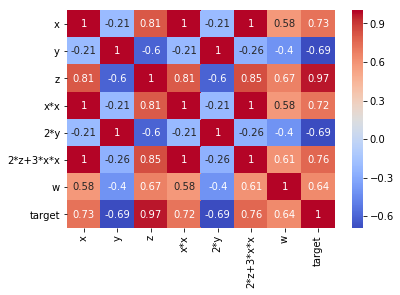

In [7]:
sns.heatmap(corr, annot=True, cmap='coolwarm')

<pre><b><font color='red'>Observation:</font>
<font color='green'>Here in above coolwarm heatmap of correlation we can observe that the feature 'z' with respective to target 
is having 0.97 value which has similar red colour near 1(highest) and feature 'y' with respective to target 
is having -0.67 value which has blue colour which means it's least related with the target.</font></b></pre>

### Task 1.2

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def apply_LR_SVM(loss, X, Y):
    
    
    print('\n------------Step 2------------')
    clf = SGDClassifier(loss = loss)        
        
    param = {'alpha': np.logspace(-3, 3, 6)}
    n_folds = 5

    #Finding best alpha using GridSearchCV method
    grid_search = GridSearchCV(estimator = clf, param_grid= param, cv=n_folds)
    grid_search.fit(X, Y)
    
    #Finding best alpha
    best_alpha = grid_search.best_params_['alpha']    
    print("\n Best hyperparameter alpha:", best_alpha)    
            
    #Finding best model
    best_model = SGDClassifier(loss='log', alpha= best_alpha)
    
    
    
    print('\n\n------------Step 3------------')
    #Splitting data into train and test with (3:1) ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=15)

    #Train the best model with original data
    best_model.fit(X_train, Y_train)

    Y_pred = best_model.predict(X_test)
    
    #Finding accuracy
    best_model_accuracy = accuracy_score(Y_test, Y_pred)
    print('\n Best Accuracy with original data:', best_model_accuracy)        
    
    #Finding weights
    W = best_model.coef_
    print('\n Weights of original data:', W)
    
    
    print('\n\n------------Step 4------------')
    #Adding noise to modify original data
    X_dash = X + 0.01

    #Splitting data into train and test with (3:1) ratio after adding noise
    X_train, X_test, Y_train, Y_test = train_test_split(X_dash, Y, test_size=0.25, random_state=15)

    #Train the best model with noisy data
    best_model.fit(X_train, Y_train)
    
    Y_pred = best_model.predict(X_test)

    #Finding accuracy
    best_model_accuracy_edited = accuracy_score(Y_test, Y_pred)
    print('\n Best Accuracy with noisy data:', best_model_accuracy_edited)
    
    #Finding weights
    W_dash = best_model.coef_
    print('\n Weights of noisy data:', W_dash)
    
    
    
    print('\n\n------------Step 5------------')
    #Accuracy difference
    print('\n Difference between Best Model Accuracy and Edited Accuracy:', best_model_accuracy - best_model_accuracy_edited)
    

    #Absolute weight difference
    abs_change_weight = np.abs(W[0] - W_dash[0])
    print('\n Absolute change between each value of W and W\':', abs_change_weight)

    #Getting top 4 features from absolute weight
    feature_indx = np.argsort(abs_change_weight)[::-1][:4]

    feature_names = np.array(data.drop(['target'], axis = 1).columns.values)

    #Printing the features importance
    print('\n Top 4 features from absolute weight:', feature_names[feature_indx])    

### Applying Logistic Regression

In [9]:
apply_LR_SVM('log', X, Y)


------------Step 2------------

 Best hyperparameter alpha: 0.001


------------Step 3------------

 Best Accuracy with original data: 1.0

 Weights of original data: [[ 2.84456326 -2.99251503  5.10601401  2.42874127 -2.99251503  2.80234978
   1.32415964]]


------------Step 4------------

 Best Accuracy with noisy data: 1.0

 Weights of noisy data: [[ 1.61383582 -1.3130531   2.72963875  1.46215216 -1.3130531   1.64545643
   1.03653034]]


------------Step 5------------

 Difference between Best Model Accuracy and Edited Accuracy: 0.0

 Absolute change between each value of W and W': [1.23072744 1.67946193 2.37637526 0.96658911 1.67946193 1.15689335
 0.2876293 ]

 Top 4 features from absolute weight: ['z' '2*y' 'y' 'x']


### Applying Linear SVM

In [10]:
apply_LR_SVM('hinge', X, Y)


------------Step 2------------

 Best hyperparameter alpha: 0.001


------------Step 3------------

 Best Accuracy with original data: 1.0

 Weights of original data: [[ 3.36344061 -3.98161631  7.2653216   2.84305694 -3.98161631  3.4359356
  -1.64835058]]


------------Step 4------------

 Best Accuracy with noisy data: 1.0

 Weights of noisy data: [[ 2.36642726 -2.07432339  3.03946931  2.01748158 -2.07432339  2.18255759
   0.76927205]]


------------Step 5------------

 Difference between Best Model Accuracy and Edited Accuracy: 0.0

 Absolute change between each value of W and W': [0.99701335 1.90729292 4.2258523  0.82557535 1.90729292 1.25337801
 2.41762262]

 Top 4 features from absolute weight: ['z' 'w' '2*y' 'y']


<pre><b><font color='red'>Observation:</font>
<font color='green'>
As per my observation after applying Logistic regression and Linear SVM, both give the same accuracy 
but with same hyperparameter alpha(0.001 and 0.001 respectively). 

The difference in accuracy before noise and after noise are same in both LR and SVM

In LR there more differences in weights vector of original data and noisy data whereas in SVM 
as compared to LR there is less difference.

Also in top 4 features, all features are same only there importance are changed in both LR and SVM.</font></b></pre>